In [1]:
%load_ext autoreload
%autoreload 2

### Watermass transformation and overturning in ECCO
21/05/21
- Look at the balance of terms in wmt within distinct watermasses

In [2]:
import xarray as xr
import so_decadal_variability as so
import matplotlib.pyplot as plt
import numpy as np
import utils.operations as op

In [3]:
rootdir = '../../data/processed/ECCO/'
filename_all = 'binned_vol_budget_month_dGamman_0.02_BF_G.nc'
filename_bowl = 'binned_vol_budget_month_dGamman_0.02_bowl_p2_BF_G.nc'
ds_all = xr.open_dataset(rootdir+filename_all).isel(gamma_n=slice(1,-1))
ds_bowl = xr.open_dataset(rootdir+filename_bowl).isel(gamma_n=slice(1,-1))

In [4]:
# Only retain non-zero values
# (This relies on the fact that nowhere else is exactly zero)
ds_all = ds_all.where(ds_all['bin_ADV']!=0,drop=True)
ds_bowl = ds_bowl.where(ds_bowl['bin_ADV']!=0,drop=True)

### Time-mean distribution

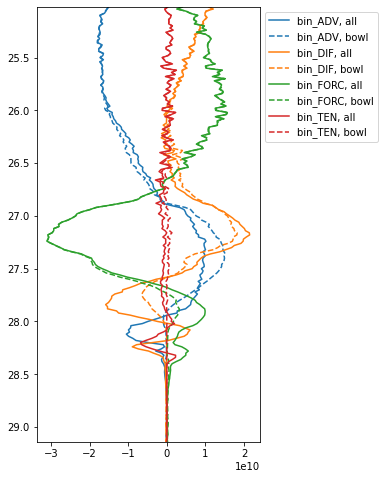

In [6]:
terms = ['bin_ADV','bin_DIF','bin_FORC','bin_TEN']
colors = {'bin_ADV':'tab:blue','bin_DIF':'tab:orange','bin_FORC':'tab:green','bin_TEN':'tab:red'}
fig,ax = plt.subplots(figsize=(4,8))
for term in terms:
    ax.plot(ds_all[term].mean('time'),ds_all['gamma_n'],
            label=term+', all',color=colors[term])
    ax.plot(ds_bowl[term].mean('time'),ds_bowl['gamma_n'],
            label=term+', bowl',color=colors[term],linestyle='--')
ax.invert_yaxis()
ax.autoscale(enable=True, axis='y', tight=True)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

#### Getting watermass boundaries
- WM boundaries are selected based on overturning at the northern boundary  
- Look for maxima and zero crossing to define watermasses  
- Check first that a smoothed profile gives a reasonable picture

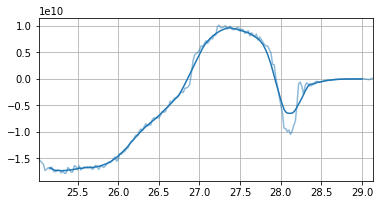

In [86]:
X = ds_all['bin_ADV'].mean('time')
Xsmooth = X.rolling({'gamma_n':15},center=True).mean()
fig,ax=plt.subplots(figsize=(6,3))
ax.plot(X['gamma_n'],X,alpha=0.5)
ax.plot(X['gamma_n'],Xsmooth,color='tab:blue')
ax.grid()
ax.autoscale(enable=True, axis='x', tight=True)

In [87]:
# Find the crossing points of the time-mean advection
c = op.crossing(Xsmooth,'gamma_n')

In [88]:
# Find the extrema
from scipy.signal import argrelextrema
ind = argrelextrema(Xsmooth.values,np.greater,order=10)
mx = X['gamma_n'].isel(gamma_n=ind[0])
ind = argrelextrema(Xsmooth.values,np.less,order=10)
mn = X['gamma_n'].isel(gamma_n=ind[0])

In [89]:
mx,mn,c

(<xarray.DataArray 'gamma_n' (gamma_n: 1)>
 array([27.36])
 Coordinates:
   * gamma_n  (gamma_n) float64 27.36,
 <xarray.DataArray 'gamma_n' (gamma_n: 1)>
 array([28.12])
 Coordinates:
   * gamma_n  (gamma_n) float64 28.12,
 <xarray.DataArray 'gamma_n' (gamma_n: 2)>
 array([26.86, 27.94])
 Coordinates:
   * gamma_n  (gamma_n) float64 26.86 27.94)